In [132]:
# Import Dependencies
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn import tree
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [104]:
# Load CSV train data 
train_df = pd.read_csv("train.csv")
# Load CSV test data 
test_df = pd.read_csv("test.csv")

In [105]:
# Check train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
# Drop columns and create train_clean dataframe 
train_clean_df = train_df.drop(['Name', 'SibSp', 'Parch', 'Embarked', 'Cabin', 'Ticket'], axis=1)
train_clean_df.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [107]:
# Check for null values
train_clean_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
dtype: int64

/Users/Tyleah1/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


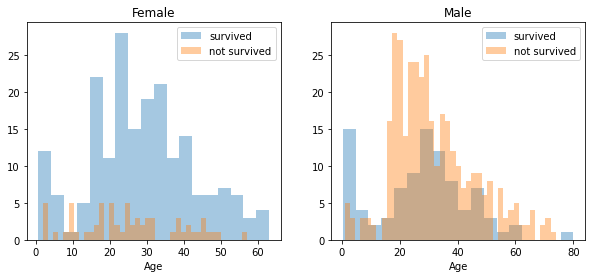

In [108]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_clean_df[train_clean_df['Sex']=='female']
men = train_clean_df[train_clean_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

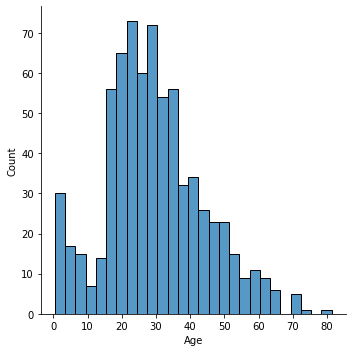

In [109]:
sns.displot(data=train_clean_df, x="Age", binwidth=3)

In [110]:
total = train_clean_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_clean_df.isnull().sum()/train_clean_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Age,177,19.9
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0


In [111]:
# Find mean age of passengers
mean_age = train_clean_df["Age"].mean()
mean_age = str(round(mean_age, 2))
mean_age

'29.7'

In [112]:
# Replace missing age with mean age of passengers
train_clean_df["Age"].fillna(train_df["Age"].mean(skipna=True), inplace=True)
train_clean_df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [113]:
total = train_clean_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_clean_df.isnull().sum()/train_clean_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0


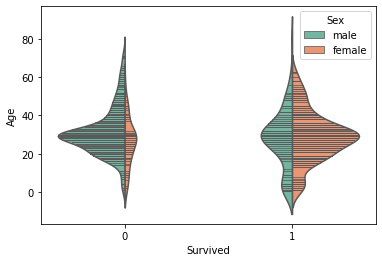

In [114]:
ax = sns.violinplot(x="Survived", y="Age", hue="Sex",
                    data=train_clean_df, palette="Set2", split=True,
                    scale="count", inner="stick")

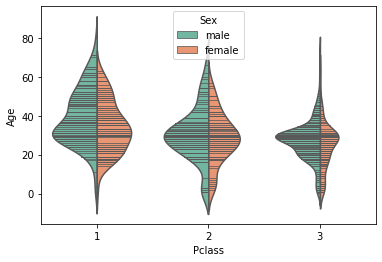

In [115]:
ax = sns.violinplot(x="Pclass", y="Age", hue="Sex",
                    data=train_clean_df, palette="Set2", split=True,
                    scale="count", inner="stick")

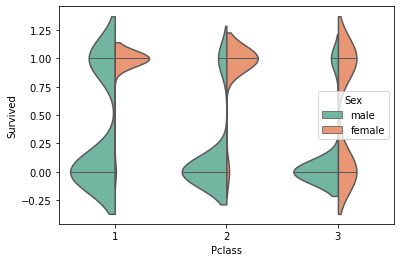

In [116]:
ax = sns.violinplot(x="Pclass", y="Survived", hue="Sex",
                    data=train_clean_df, palette="Set2", split=True,
                    scale="count", inner="stick")

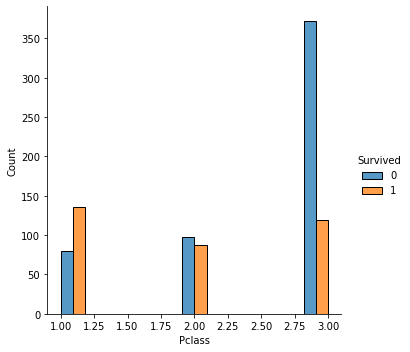

In [117]:
sns.displot(train_clean_df, x="Pclass", hue="Survived", multiple="dodge")

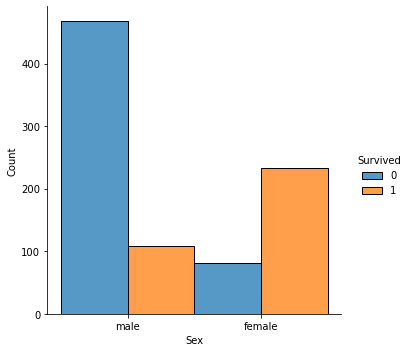

In [118]:
sns.displot(train_clean_df, x="Sex", hue="Survived", multiple="dodge")

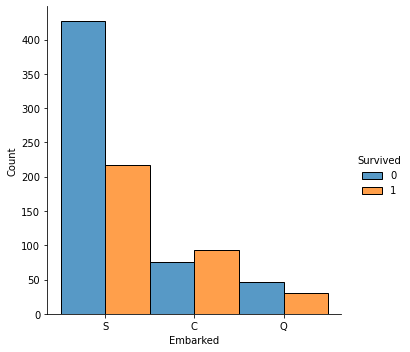

In [119]:
sns.displot(train_df, x="Embarked", hue="Survived", multiple="dodge")

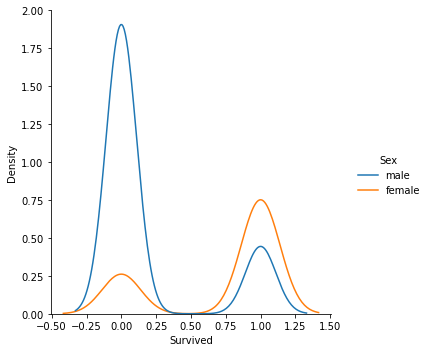

In [120]:
sns.displot(train_clean_df, x="Survived", hue="Sex", kind="kde")

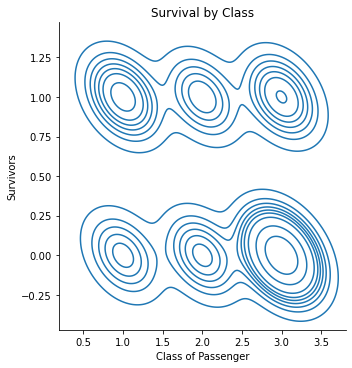

In [121]:
ax = sns.displot(train_clean_df, x="Pclass", y="Survived", kind="kde")

#specfiy axis labels
ax.set(xlabel='Class of Passenger',
       ylabel='Survivors',
       title='Survival by Class')

#display barplot
plt.show()

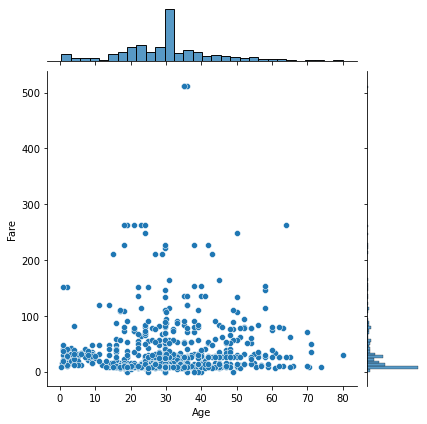

In [122]:
sns.jointplot(data=train_clean_df, x="Age", y="Fare")

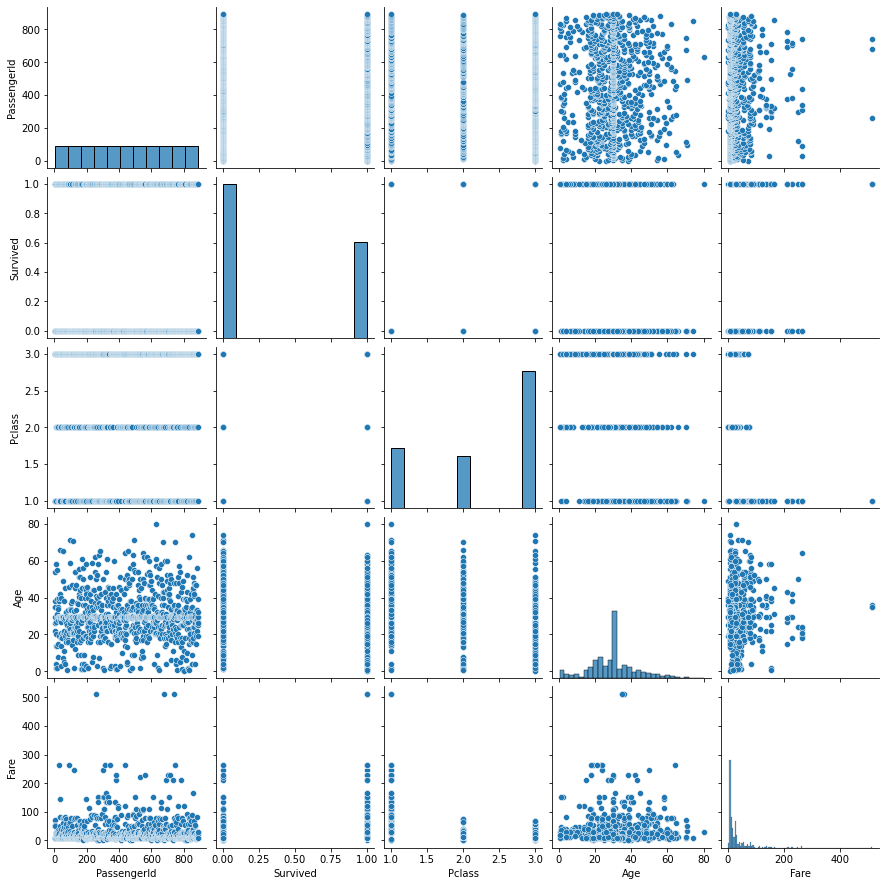

In [76]:
sns.pairplot(train_clean_df)

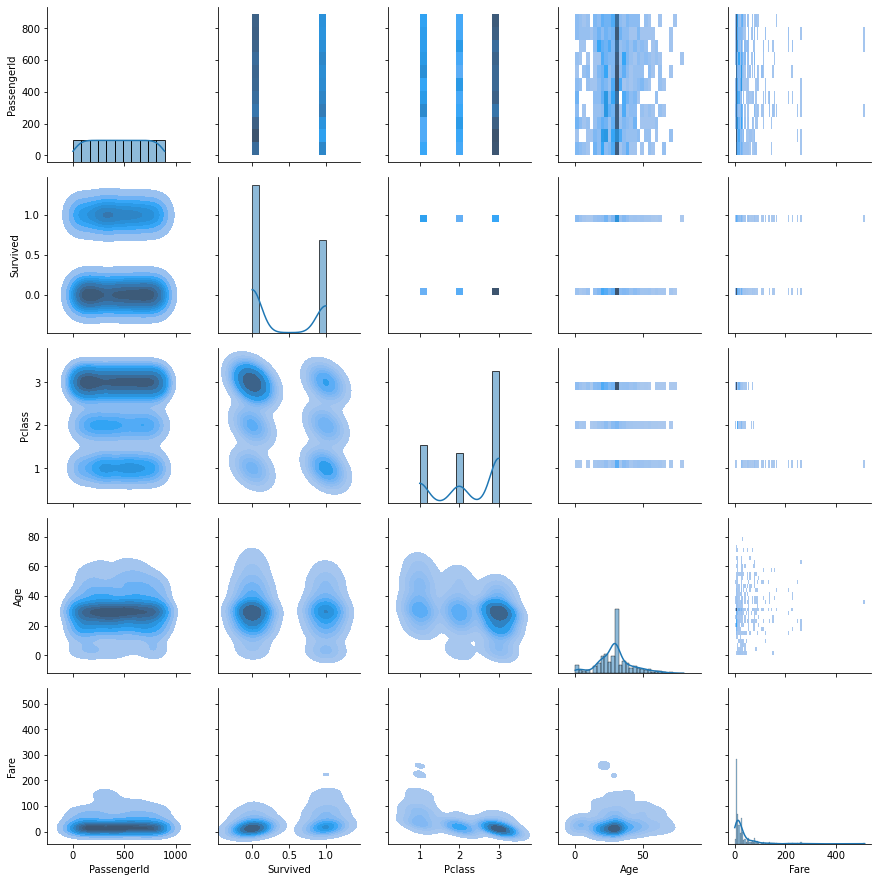

In [77]:
g = sns.PairGrid(train_clean_df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

/Users/Tyleah1/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


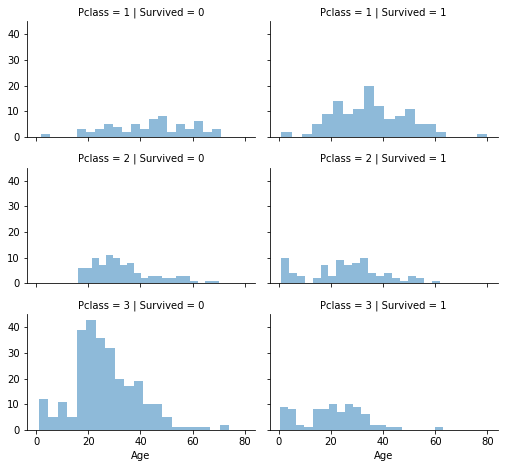

In [84]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [123]:
train_clean_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [124]:
train_clean_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
dtype: object

In [125]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(train_clean_df.Sex.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Sex'])
encode_df.head()

/Users/Tyleah1/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [126]:
train_clean_df = train_clean_df.merge(encode_df,left_index=True,right_index=True).drop("Sex",1)
train_clean_df.head()

/Users/Tyleah1/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Age,Fare,Sex_female,Sex_male
0,1,0,3,22.0,7.2500,0.0,1.0
1,2,1,1,38.0,71.2833,1.0,0.0
2,3,1,3,26.0,7.9250,1.0,0.0
3,4,1,1,35.0,53.1000,1.0,0.0
4,5,0,3,35.0,8.0500,0.0,1.0


In [97]:
X_train = train_clean_df.drop("Survived", axis=1)
y_train = train_clean_df["Survived"]

# Random Forest

In [127]:
# Define features set
X = train_clean_df.copy()
X = X.drop(["Survived"], axis=1)
X.head()

,PassengerId,Pclass,Age,Fare,Sex_female,Sex_male
0,1,3,22.0,7.2500,0.0,1.0
1,2,1,38.0,71.2833,1.0,0.0
2,3,3,26.0,7.9250,1.0,0.0
3,4,1,35.0,53.1000,1.0,0.0
4,5,3,35.0,8.0500,0.0,1.0


In [128]:
#Define the target set.
y = train_clean_df["Survived"].ravel()
y[:5]

array([0, 1, 1, 1, 0])

In [129]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [130]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [133]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [134]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [136]:
#Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1])

In [137]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,120,23
Actual 1,21,59


In [138]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.8026905829596412

In [139]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,120,23
Actual 1,21,59


Accuracy Score : 0.8026905829596412
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       143
           1       0.72      0.74      0.73        80

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [140]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.22424264, 0.08587626, 0.20231076, 0.24370231, 0.12583422,
       0.11803381])

In [141]:
# We can sort the features by their order of importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.24370230752496913, 'Fare'),
 (0.22424264224115797, 'PassengerId'),
 (0.2023107594793678, 'Age'),
 (0.12583422190774418, 'Sex_female'),
 (0.11803380613187414, 'Sex_male'),
 (0.08587626271488667, 'Pclass')]